<a href="https://colab.research.google.com/github/bino1kromo/Project-data-analysis-meysi/blob/main/Notebook_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Meysi Supmawati
- **Email:** meysi.supmawati25@gmail.com
- **ID Dicoding:** meysisupmawati

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan dan pendapatan perusahaan tersebut?
- Produk atau kategori apa yang memiliki volume penjualan tertinggi dan terendah, dan apa alasan di balik performa tersebut?
- Bagaimana distribusi recency, frequency, monetary, tenure, dan customer lifetime value pada data pelanggan, dan apa implikasinya terhadap strategi retensi pelanggan serta peningkatan nilai transaksi secara keseluruhan?
-Bagaimana distribusi status pesanan pada platform e-commerce ini, dan status mana yang paling dominan?
- Bagaimana performa pengiriman aktual dibandingkan dengan waktu pengiriman yang diperkirakan dalam distribusi perbedaan hari? Apakah sebagian besar pengiriman tepat waktu atau ada kecenderungan untuk lebih lambat atau lebih cepat dari estimasi?
- Bagaimana distribusi jumlah pelanggan berdasarkan segmen pelanggan?
- Siapa saja 10 penjual teratas berdasarkan total penjualan, dan bagaimana distribusi kinerja mereka?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d olistbr/brazilian-ecommerce
!kaggle datasets download -d olistbr/brazilian-ecommerce
!unzip brazilian-ecommerce.zip

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
 96% 41.0M/42.6M [00:00<00:00, 71.0MB/s]
100% 42.6M/42.6M [00:00<00:00, 74.8MB/s]
Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
brazilian-ecommerce.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  



## Data Wrangling

### Gathering Data

Order Items Dataframe:

Berisi data tentang item yang dibeli dalam setiap pesanan.

In [4]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# Buat kolom baru 'order_value' dengan menjumlahkan 'price' dan 'freight_value'
order_items['order_value'] = order_items['price'] + order_items['freight_value']
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,343.40
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,386.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,116.85
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,64.71


Orders Dataframe

Ini adalah dataframe pusat, dapat digunakan untuk mengakses informasi tentang semua kerangka data lainnya.

In [6]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Product Dataframe

Berisi data tentang produk yang dijual di Olist.

In [7]:
products = pd.read_csv('olist_products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Customers Dataframe

Berisi informasi tentang pelanggan dan lokasinya. Customer_unique_id memungkinkan tampak seolah-olah setiap pesanan memiliki pelanggan yang berbeda.

In [8]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Sellers Dataframe

Berisi data penjual yangg memenuhi pesanan yang dilakukan di Olist dan dapat menemukan lokasi penjual.

In [9]:
sellers = pd.read_csv('olist_sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Product Category Name Translation

Berisi data terjemahan entri product_category_name ke dalam bahasa Inggris.

In [10]:
product_categorys = pd.read_csv('product_category_name_translation.csv')
product_categorys.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Geolocation Dataframe

Berisi informasi tentang kode pos Brasil dan koordinat lintang/bujurnya. Data ini dapat digunakan untuk membuat peta dan menghitung jarak antara penjual dan pelanggan

In [11]:
geolocations = pd.read_csv('olist_geolocation_dataset.csv')
geolocations.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Assessing Data

Melihat sekilas data untuk menilai kualitas dan kelengkapan.

In [12]:
dataframes = [
    (order_items, 'order_items'),
    (orders, 'orders'),
    (products, 'products'),
    (customers, 'customers'),
    (sellers, 'sellers'),
    (product_categorys, 'product_categorys'),
    (geolocations, 'geolocations')
]

# Check for duplicates
for df, name in dataframes:
    print(f"{name} : {df.duplicated().sum()} duplicates.")


order_items : 0 duplicates.
orders : 0 duplicates.
products : 0 duplicates.
customers : 0 duplicates.
sellers : 0 duplicates.
product_categorys : 0 duplicates.
geolocations : 261831 duplicates.


In [13]:
for df, name in dataframes:
    print(f"{name} missing values:\n{df.isnull().sum()}\n")

order_items missing values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
order_value            0
dtype: int64

orders missing values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

products missing values:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

customers missing values:
customer_id                 0
customer_unique_

### Cleaning Data

Menangani missing values, outliers, dan inkonsistensi data.

In [14]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [15]:
# Menghilangkan baris dengan missing values pada products
products = products.dropna()
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


## Exploratory Data Analysis (EDA)

In [16]:
products = products.merge(product_categorys, on='product_category_name', how='inner')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [17]:
# Drop kolom 'product_category_name'
products= products.drop(columns=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])

# Susun ulang kolom untuk menempatkan 'product_category_name_english' setelah 'product_id'
columns = ['product_id','product_category_name_english']
products1 = products[columns]
products1.head()

,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [18]:
# Merge, rename, dan reorder columns
sellers = sellers.merge(
    geolocations,
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner'
).rename(columns={
    'geolocation_lat': 'seller_geolocation_lat',
    'geolocation_lng': 'seller_geolocation_lng'
})[
    ['seller_id', 'seller_zip_code_prefix', 'seller_geolocation_lat', 'seller_geolocation_lng',
     'seller_city', 'geolocation_city', 'seller_state', 'geolocation_state']
]

sellers


,seller_id,seller_zip_code_prefix,seller_geolocation_lat,seller_geolocation_lng,seller_city,geolocation_city,seller_state,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,-22.898536,-47.063125,campinas,campinas,SP,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,-22.895499,-47.061944,campinas,campinas,SP,SP
2,3442f8959a84dea7ee197c632cb2df15,13023,-22.891740,-47.060820,campinas,campinas,SP,SP
3,3442f8959a84dea7ee197c632cb2df15,13023,-22.895762,-47.066144,campinas,campinas,SP,SP
4,3442f8959a84dea7ee197c632cb2df15,13023,-22.896154,-47.062431,campinas,campinas,SP,SP
...,...,...,...,...,...,...,...,...
435082,9e25199f6ef7e7c347120ff175652c3b,12051,-23.011130,-45.592347,taubate,taubate,SP,SP
435083,9e25199f6ef7e7c347120ff175652c3b,12051,-23.013452,-45.584299,taubate,taubaté,SP,SP
435084,9e25199f6ef7e7c347120ff175652c3b,12051,-23.009155,-45.592019,taubate,taubate,SP,SP
435085,9e25199f6ef7e7c347120ff175652c3b,12051,-23.009019,-45.584925,taubate,taubate,SP,SP


In [19]:
# Drop the unused columns from sellers_df
sellers = sellers.drop(columns=['geolocation_city', 'seller_zip_code_prefix', 'geolocation_state'])
sellers

,seller_id,seller_geolocation_lat,seller_geolocation_lng,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,-22.898536,-47.063125,campinas,SP
1,3442f8959a84dea7ee197c632cb2df15,-22.895499,-47.061944,campinas,SP
2,3442f8959a84dea7ee197c632cb2df15,-22.891740,-47.060820,campinas,SP
3,3442f8959a84dea7ee197c632cb2df15,-22.895762,-47.066144,campinas,SP
4,3442f8959a84dea7ee197c632cb2df15,-22.896154,-47.062431,campinas,SP
...,...,...,...,...,...
435082,9e25199f6ef7e7c347120ff175652c3b,-23.011130,-45.592347,taubate,SP
435083,9e25199f6ef7e7c347120ff175652c3b,-23.013452,-45.584299,taubate,SP
435084,9e25199f6ef7e7c347120ff175652c3b,-23.009155,-45.592019,taubate,SP
435085,9e25199f6ef7e7c347120ff175652c3b,-23.009019,-45.584925,taubate,SP


In [20]:
# Remove duplicate rows from sellers_df
sellers1 = sellers.drop_duplicates()

# Verify that duplicates have been removed
print(f"Number of rows after removing duplicates: {sellers1.shape[0]}")

Number of rows after removing duplicates: 303885


In [21]:
# Group by 'seller_id' and count the number of unique sellers
unique_sellers_count = sellers1['seller_id'].nunique()

print(f"The number of unique sellers is: {unique_sellers_count}")

The number of unique sellers is: 3088


In [22]:
# Merge customers_df with geolocation_df on the 'zip_code_prefix' column
customers = customers.merge(geolocations, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

# Rename the specified columns
customers = customers.rename(columns={
    'geolocation_lat': 'customer_geolocation_lat',
    'geolocation_lng': 'customer_geolocation_lng'
})

# Reorder the columns
customers = customers[['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_geolocation_lat', 'customer_geolocation_lng', 'customer_city','geolocation_city', 'customer_state', 'geolocation_state']]

customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_geolocation_lat,customer_geolocation_lng,customer_city,geolocation_city,customer_state,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.509897,-47.397866,franca,franca,SP,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.497396,-47.399241,franca,franca,SP,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.510459,-47.399553,franca,franca,SP,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.480940,-47.394161,franca,franca,SP,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,-20.515413,-47.398194,franca,franca,SP,SP


In [23]:
# Drop the unused columns from sellers_df
customers1 = customers.drop(columns=['geolocation_city', 'geolocation_state', 'customer_unique_id','customer_zip_code_prefix'])
customers1

,customer_id,customer_geolocation_lat,customer_geolocation_lng,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...
15083450,274fa6071e5e17fe303b9748641082c8,-23.599369,-46.905603,cotia,SP
15083451,274fa6071e5e17fe303b9748641082c8,-23.593577,-46.910112,cotia,SP
15083452,274fa6071e5e17fe303b9748641082c8,-23.584425,-46.892014,cotia,SP
15083453,274fa6071e5e17fe303b9748641082c8,-23.595022,-46.918546,cotia,SP


In [24]:
# Remove duplicate rows from customers_df
customers1 = customers1.drop_duplicates()

# Verify that duplicates have been removed
print(f"Number of rows after removing duplicates: {customers1.shape[0]}")

Number of rows after removing duplicates: 10071364


In [25]:
customers_data = customers1
# Menyimpan hasil penggabungan ke dalam file CSV
customers_data.to_csv('customers_data.csv', index=False)

print("Data berhasil disimpan ke customers_data.csv")

Data berhasil disimpan ke customers_data.csv


In [26]:
# Menggabungkan data order_items dengan orders berdasarkan order_id
sales_data = pd.merge(order_items, orders, on='order_id')

# Menggabungkan hasil penggabungan dengan products1 berdasarkan product_id
sales_data = pd.merge(sales_data, products1, on='product_id')

# Menyimpan hasil penggabungan ke dalam file CSV
sales_data.to_csv('sales_data.csv', index=False)

print("Data berhasil disimpan ke sales_data.csv")

Data berhasil disimpan ke sales_data.csv


In [27]:
# Mengonversi kolom tanggal ke format datetime
sales_data['order_purchase_timestamp'] = pd.to_datetime(sales_data['order_purchase_timestamp'])
sales_data['order_delivered_customer_date'] = pd.to_datetime(sales_data['order_delivered_customer_date'])
sales_data['order_approved_at'] = pd.to_datetime(sales_data['order_approved_at'])
sales_data['order_estimated_delivery_date'] = pd.to_datetime(sales_data['order_estimated_delivery_date'])
sales_data['shipping_limit_date'] = pd.to_datetime(sales_data['shipping_limit_date'])

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualan dan pendapatan perusahaan tersebut?

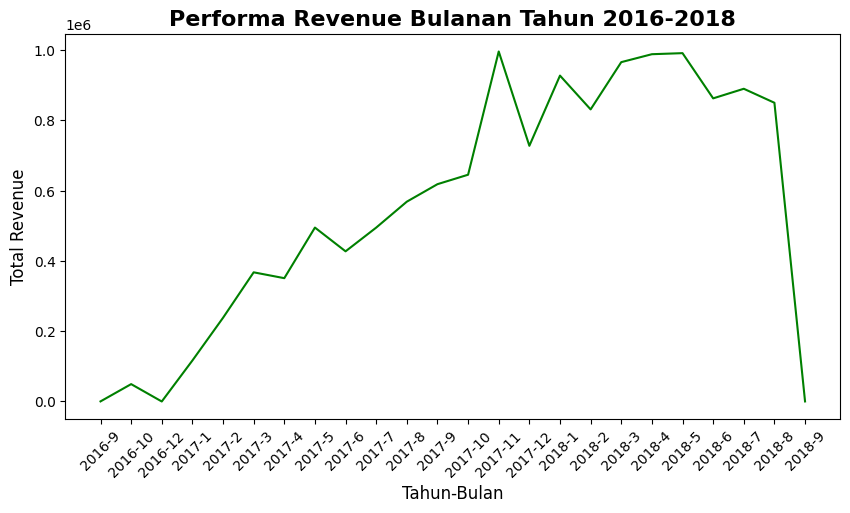

In [28]:
# Menambahkan kolom bulan dan tahun
sales_data['order_purchase_month'] = pd.to_datetime(sales_data['order_purchase_timestamp']).dt.month
sales_data['order_purchase_year'] = pd.to_datetime(sales_data['order_purchase_timestamp']).dt.year

# Menghitung total penjualan dan revenue
monthly_sales = sales_data.groupby(['order_purchase_year', 'order_purchase_month'])['price'].sum().reset_index()
monthly_sales['month_year'] = monthly_sales['order_purchase_year'].astype(str) + '-' + monthly_sales['order_purchase_month'].astype(str)

# Visualisasi performa penjualan dan revenue
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='month_year', y='price', color='#008000')
plt.xticks(rotation=45)
plt.title('Performa Revenue Bulanan Tahun 2016-2018', fontsize=16, fontweight='bold')
plt.xlabel('Tahun-Bulan', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.show()

**Insight:**

- Tren Pertumbuhan yang Signifikan: Secara umum, revenue menunjukkan tren pertumbuhan yang stabil dari akhir 2016 hingga pertengahan 2018, dengan kenaikan yang signifikan terutama pada awal 2017 hingga akhir 2017.

- Puncak Revenue: Revenue mencapai puncaknya pada awal 2018. Hal ini mungkin disebabkan oleh strategi pemasaran yang efektif, peningkatan jumlah pesanan, atau adanya acara promosi tertentu.

- Penurunan pada Akhir Periode: Setelah puncak, terjadi penurunan revenue yang signifikan pada akhir 2018. Penurunan drastis ini dapat disebabkan oleh faktor musiman, perubahan strategi penjualan, atau tantangan logistik.

- Fokus Perbaikan: Untuk mempertahankan pertumbuhan, perusahaan perlu menganalisis lebih lanjut penyebab penurunan revenue di akhir periode dan mengidentifikasi bulan atau event yang mendorong peningkatan revenue tertinggi untuk replikasi di masa mendatang.

### Pertanyaan 2: Produk atau kategori apa yang memiliki volume penjualan tertinggi dan terendah, dan apa alasan di balik performa tersebut?

   product_category_name_english  order_item_id
0                 bed_bath_table          11115
1                  health_beauty           9670
2                 sports_leisure           8641
3                furniture_decor           8334
4          computers_accessories           7827
..                           ...            ...
66         arts_and_craftmanship             24
67             cds_dvds_musicals             14
68                    la_cuisine             14
69     fashion_childrens_clothes              8
70         security_and_services              2

[71 rows x 2 columns]


<ipython-input-29-ef84e2bdd5de>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales.head(10), x='order_item_id', y='product_category_name_english', palette='Greens_r') # Now using a DataFrame


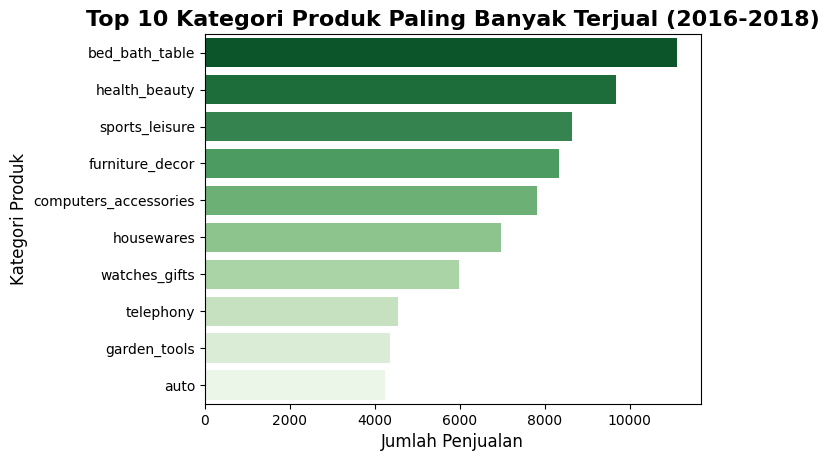

In [29]:
# Menghitung jumlah penjualan produk
product_sales = sales_data['product_category_name_english'].value_counts().reset_index()
product_sales.columns = ['product_category_name_english', 'order_item_id']  # Rename columns for clarity
print(product_sales) # Print to inspect the DataFrame

# Visualisasi
sns.barplot(data=product_sales.head(10), x='order_item_id', y='product_category_name_english', palette='Greens_r') # Now using a DataFrame
plt.title('Top 10 Kategori Produk Paling Banyak Terjual (2016-2018)', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Penjualan', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.show()

**Insight:**

- Produk Dominan: Kategori "bed_bath_table" menempati posisi teratas sebagai produk dengan jumlah penjualan terbanyak, menunjukkan bahwa permintaan terhadap produk ini sangat tinggi dibandingkan kategori lainnya.
- Tren Penjualan: Kategori seperti "health_beauty" dan "sports_leisure" juga menunjukkan performa penjualan yang kuat, menandakan bahwa produk di bidang kesehatan, kecantikan, serta olahraga dan rekreasi memiliki daya tarik besar di pasar.
- Peluang Optimasi: Kategori yang berada di posisi bawah seperti "garden_tools" dan "auto" mungkin perlu dievaluasi lebih lanjut untuk memahami penyebab rendahnya penjualan, apakah karena kurangnya promosi, harga, atau permintaan pasar yang lebih rendah. Ini bisa menjadi area untuk perbaikan strategi pemasaran.

### Pertanyaan 3: Bagaimana distribusi recency, frequency, monetary, tenure, dan customer lifetime value pada data pelanggan, dan apa implikasinya terhadap strategi retensi pelanggan serta peningkatan nilai transaksi secara keseluruhan?

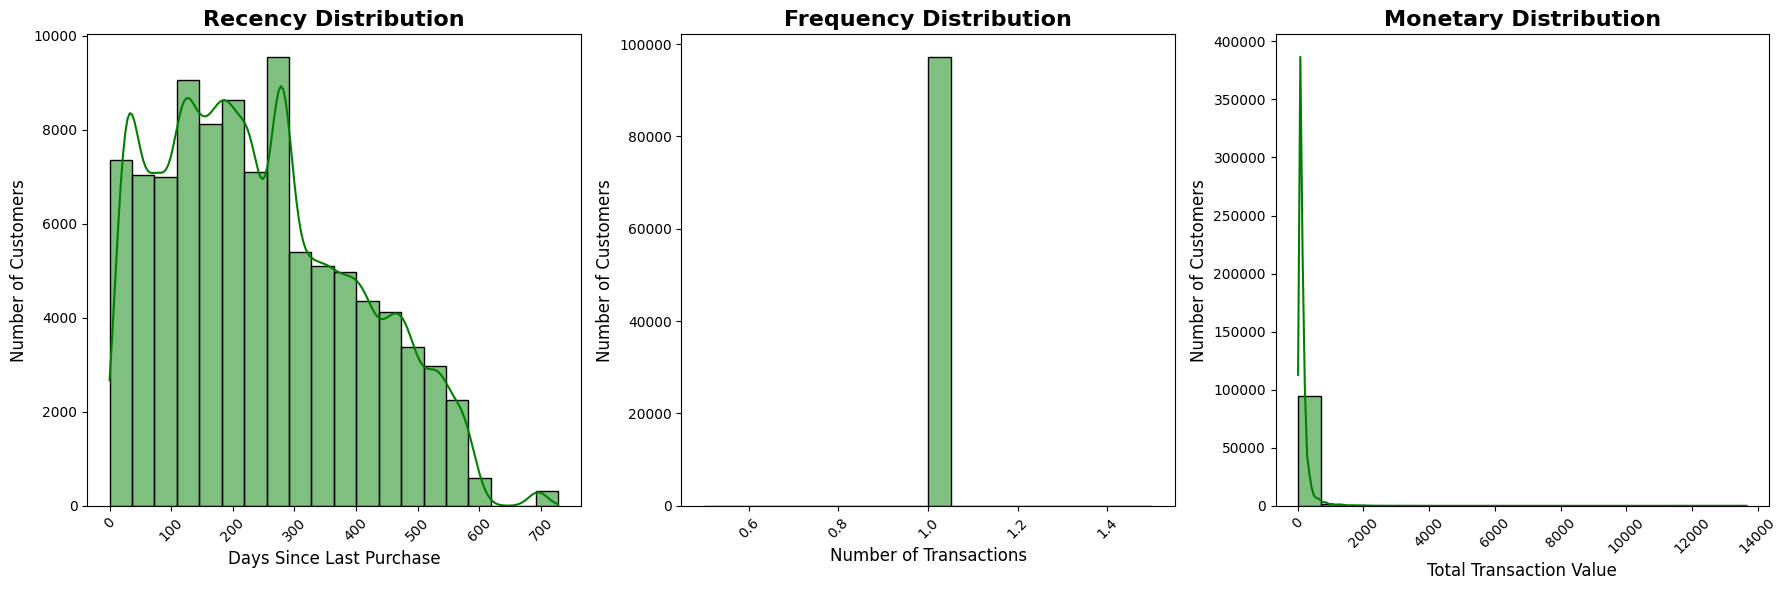

In [30]:
# Recency: Menghitung hari sejak pembelian terakhir per pelanggan
sales_data['days_since_last_purchase'] = (sales_data['order_purchase_timestamp'].max() - sales_data['order_purchase_timestamp']).dt.days
recency = sales_data.groupby('customer_id')['days_since_last_purchase'].min().reset_index()

# Frequency: Menghitung jumlah transaksi per pelanggan
frequency = sales_data.groupby('customer_id')['order_id'].nunique().reset_index()

# Monetary: Menghitung nilai total transaksi per pelanggan
monetary = sales_data.groupby('customer_id')['order_value'].sum().reset_index()

# Menggabungkan RFM
rfm = recency.merge(frequency, on='customer_id').merge(monetary, on='customer_id')

# Membuat figur dengan 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualisasi Recency
sns.histplot(rfm['days_since_last_purchase'], bins=20, kde=True, color='#008000', ax=axes[0])
axes[0].set_title('Recency Distribution', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Days Since Last Purchase', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Visualisasi Frequency
sns.histplot(frequency['order_id'], bins=20, kde=True, color='#008000', ax=axes[1])
axes[1].set_title('Frequency Distribution', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Number of Transactions', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Visualisasi Monetary
sns.histplot(monetary['order_value'], bins=20, kde=True, color='#008000', ax=axes[2])
axes[2].set_title('Monetary Distribution', fontsize=16, fontweight='bold')
axes[2].set_xlabel('Total Transaction Value', fontsize=12)
axes[2].set_ylabel('Number of Customers', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)

# Menambahkan sedikit spasi antar plot
plt.tight_layout()
plt.show()

**Insight:**
- Recency menunjukkan bahwa mayoritas pelanggan telah melakukan pembelian terakhir dalam 200-300 hari terakhir. Ini mengindikasikan adanya potensi pelanggan yang tidak aktif lagi. Strategi re-engagement seperti kampanye email atau diskon bisa diterapkan untuk menarik kembali pelanggan yang sudah lama tidak bertransaksi.

- Frequency memperlihatkan bahwa sebagian besar pelanggan hanya melakukan satu kali transaksi. Ini menunjukkan perlunya strategi peningkatan pembelian berulang (repeat purchase), seperti program loyalitas atau insentif yang mendorong pelanggan untuk kembali berbelanja.

- Monetary menunjukkan distribusi yang sangat tidak merata, dengan sebagian kecil pelanggan memberikan kontribusi terbesar terhadap total transaksi. Segmentasi pelanggan dengan nilai transaksi tinggi perlu difokuskan untuk menjaga loyalitas mereka, sambil mengembangkan strategi up-selling dan cross-selling.


Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'order_value',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'product_category_name_english', 'order_purchase_month',
       'order_purchase_year', 'days_since_last_purchase',
       'first_purchase_date', 'days_since_first_purchase',
       'customer_lifetime_value'],
      dtype='object')


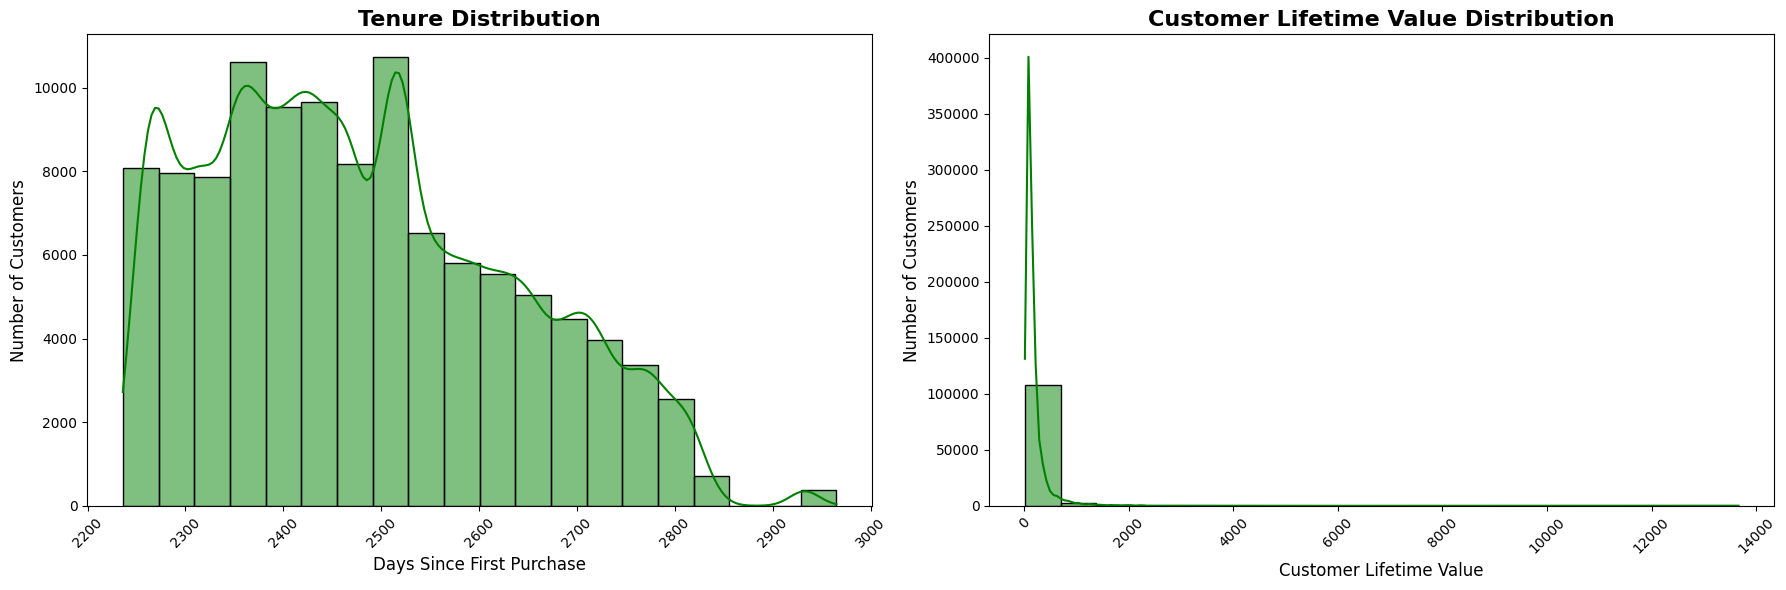

In [31]:
# Menghitung days_since_first_purchase
sales_data['order_purchase_timestamp'] = pd.to_datetime(sales_data['order_purchase_timestamp'])
first_purchase = sales_data.groupby('customer_id')['order_purchase_timestamp'].min().reset_index()
first_purchase.columns = ['customer_id', 'first_purchase_date']

# Gabungkan kembali dengan sales_data untuk mendapatkan days_since_first_purchase
sales_data = sales_data.merge(first_purchase, on='customer_id')
sales_data['days_since_first_purchase'] = (pd.to_datetime('today') - sales_data['first_purchase_date']).dt.days

# Menghitung customer_lifetime_value
clv = sales_data.groupby('customer_id')['order_value'].sum().reset_index()
clv.columns = ['customer_id', 'customer_lifetime_value']  # Ensure column is named 'customer_lifetime_value'

# Gabungkan kembali dengan DataFrame yang ada, inisialisasi rfm_clv dengan rfm
rfm_clv = rfm.merge(clv, on='customer_id', how='left') # Assign rfm to rfm_clv initially

# Gabungkan 'customer_lifetime_value' kembali ke sales_data
sales_data = sales_data.merge(clv, on='customer_id', how='left') # Merge clv back into sales_data

# Verifikasi bahwa kolom 'customer_lifetime_value' ada di sales_data
print(sales_data.columns)  # Print columns to check if 'customer_lifetime_value' is present

# Membuat figur dengan 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Visualisasi Tenure
sns.histplot(sales_data['days_since_first_purchase'], bins=20, kde=True, color='#008000', ax=axes[0])
axes[0].set_title('Tenure Distribution', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Days Since First Purchase', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Visualisasi Customer Lifetime Value (CLV)
sns.histplot(sales_data['customer_lifetime_value'], bins=20, kde=True, color='#008000', ax=axes[1])
axes[1].set_title('Customer Lifetime Value Distribution', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Customer Lifetime Value', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Menambahkan sedikit spasi antar plot
plt.tight_layout()
plt.show()

**Insight:**
- Tenure menunjukkan bahwa pelanggan yang lebih lama bertahan umumnya berkontribusi lebih besar, namun ada penurunan yang signifikan pada pelanggan yang sudah sangat lama. Ini mengindikasikan kebutuhan untuk memperkuat program loyalitas agar pelanggan yang sudah lama bertahan lebih aktif.
- Customer Lifetime Value yang sangat miring menunjukkan bahwa sebagian besar pendapatan berasal dari sebagian kecil pelanggan. Perusahaan perlu memberikan perhatian khusus pada pelanggan dengan nilai tinggi untuk meningkatkan retensi, sekaligus mencari cara untuk meningkatkan lifetime value dari pelanggan dengan kontribusi lebih rendah.


### Pertanyaan 4: Bagaimana distribusi status pesanan pada platform e-commerce ini, dan status mana yang paling dominan?

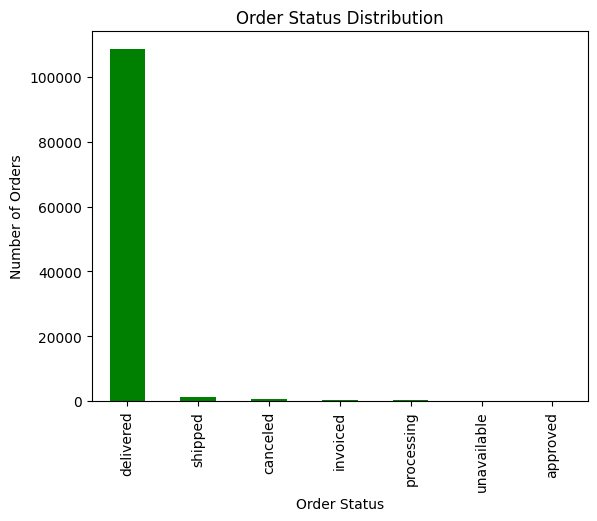

In [32]:
# Distribusi status pesanan
order_status_count = sales_data['order_status'].value_counts()

# Visualisasi status pesanan
order_status_count.plot(kind='bar', color='#008000')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.show()

**Insight:**

Dari grafik yang ditampilkan, terlihat bahwa mayoritas besar pesanan memiliki status "delivered", yang menunjukkan bahwa pesanan telah berhasil dikirim dan diterima oleh pelanggan. Sementara itu, status lain seperti "shipped", "canceled", "invoiced", "processing", "unavailable", dan "approved" menunjukkan jumlah yang sangat kecil. Ini mengindikasikan bahwa sebagian besar pesanan diproses dan dikirim dengan sukses, tetapi ada beberapa kasus di mana pesanan dibatalkan atau sedang dalam tahap proses lain. Hal ini bisa menjadi indikasi bahwa operasional pengiriman cukup efisien, meskipun mungkin perlu penyelidikan lebih lanjut pada pesanan yang tidak berhasil dikirim untuk memahami penyebabnya.

### Pertanyaan 5: Bagaimana performa pengiriman aktual dibandingkan dengan waktu pengiriman yang diperkirakan dalam distribusi perbedaan hari? Apakah sebagian besar pengiriman tepat waktu atau ada kecenderungan untuk lebih lambat atau lebih cepat dari estimasi?

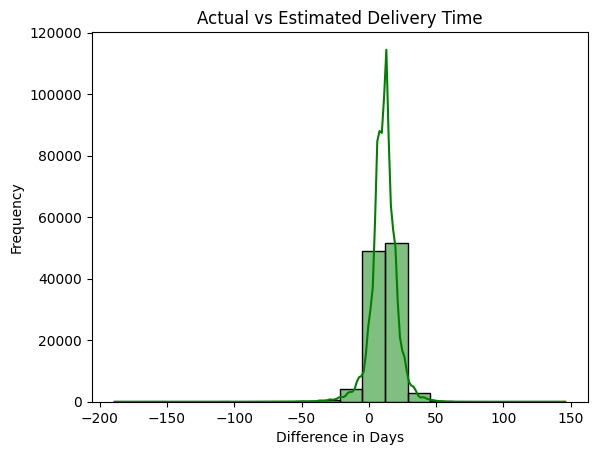

In [33]:
# Waktu pengiriman sebenarnya vs perkiraan
sales_data['delivery_diff_days'] = (sales_data['order_estimated_delivery_date'] - sales_data['order_delivered_customer_date']).dt.days

# Visualisasi perbedaan waktu pengiriman
sns.histplot(sales_data['delivery_diff_days'], bins=20, kde=True, color='#008000')
plt.title('Actual vs Estimated Delivery Time')
plt.xlabel('Difference in Days')
plt.ylabel('Frequency')
plt.show()

**Insight:**

Dari grafik terlihat bahwa performa pengiriman menunjukkan distribusi yang sebagian besar berada di sekitar 0 hari perbedaan, yang berarti pengiriman aktual biasanya sesuai dengan waktu yang diperkirakan. Namun, ada rentang kecil di mana beberapa pengiriman terlambat (nilai positif) dan beberapa lainnya lebih cepat dari perkiraan (nilai negatif).

Tingginya frekuensi di sekitar 0 menunjukkan bahwa pengiriman secara umum akurat dan sesuai estimasi, tetapi penyebaran ke sisi positif mengindikasikan adanya sejumlah kasus keterlambatan. Insight ini menunjukkan bahwa meskipun mayoritas pengiriman tepat waktu, perusahaan mungkin perlu fokus pada pengecekan titik-titik yang menyebabkan keterlambatan untuk meningkatkan efisiensi pengiriman.

### Pertanyaan 6: "Bagaimana distribusi jumlah pelanggan berdasarkan segmen pelanggan?"

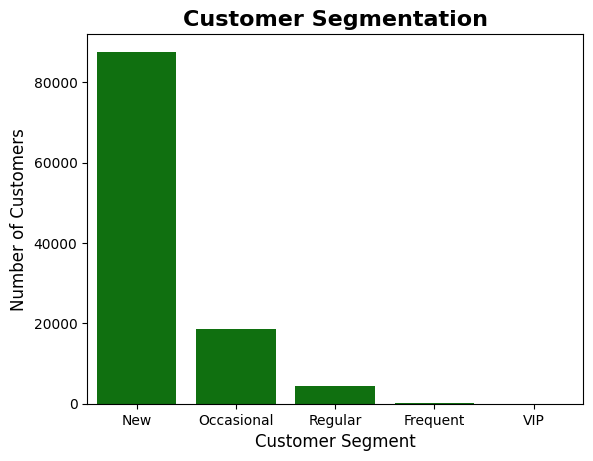

In [34]:
# Menentukan segmen pelanggan secara manual
bins = [0, 1, 3, 10, 50, float('inf')]
labels = ['New', 'Occasional', 'Regular', 'Frequent', 'VIP']
sales_data['frequency_segment'] = pd.cut(sales_data.groupby('customer_id')['order_id'].transform('count'), bins=bins, labels=labels)

# Visualisasi Segmen Pelanggan
sns.countplot(x='frequency_segment', data=sales_data, color='#008000')
plt.title('Customer Segmentation', fontsize=16, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
#plt.xticks(rotation=45)
plt.show()

**Insight:**

Sebagian besar pelanggan dalam dataset ini adalah pelanggan baru, dengan lebih dari 80.000 pelanggan, menunjukkan bahwa banyak pelanggan yang baru mencoba layanan atau produk perusahaan.Perusahaan mungkin perlu fokus pada strategi retensi pelanggan, misalnya dengan memberikan insentif atau promosi yang menarik untuk pelanggan baru agar mereka tetap berinteraksi dan menjadi pelanggan setia.

### Pertanyaan 7: Siapa saja 10 penjual teratas berdasarkan total penjualan, dan bagaimana distribusi kinerja mereka?

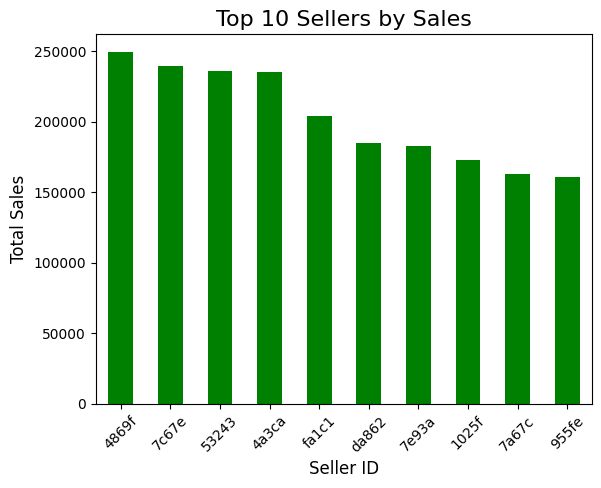

In [35]:
# Penjual dengan penjualan tertinggi
top_sellers = sales_data.groupby('seller_id')['order_value'].sum().sort_values(ascending=False).head(10)

# Memotong seller_id menjadi hanya 5 karakter pertama
top_sellers.index = top_sellers.index.str[:5]  # Memotong hanya 5 karakter pertama

# Visualisasi penjualan per penjual
top_sellers.plot(kind='bar', color='#008000')
plt.title('Top 10 Sellers by Sales', fontsize=16)
plt.xlabel('Seller ID', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Insight:**

Top Performer (4869f): Penjual dengan ID 4869f merupakan penjual dengan total penjualan tertinggi, mencapai lebih dari 250.000, menunjukkan bahwa penjual ini sangat sukses dalam menjual produk mereka.

Seller Performance: Perbedaan penjualan di antara penjual top lainnya relatif kecil, khususnya antara penjual peringkat kedua hingga keempat. Hal ini menunjukkan bahwa mereka memiliki performa yang hampir setara dalam penjualan.

## Analisis Lanjutan

### Bagaimana distribusi geografis penjual di Brazil memengaruhi potensi ekspansi bisnis e-commerce di wilayah-wilayah tertentu?

In [36]:
!pip install folium

In [37]:
import folium  # Import folium library
from folium.plugins import HeatMap

# Group by 'seller_id' and calculate mean latitude and longitude
unique_sellers = sellers.groupby('seller_id').agg({
    'seller_geolocation_lat': 'mean',
    'seller_geolocation_lng': 'mean'
}).reset_index()

# Create a base map centered around the center of Brazil
sellers_map = folium.Map(location=[-14.2350, -51.9253], tiles='cartodbpositron', zoom_start=5)

# Add a heatmap to the base map using the unique seller locations
HeatMap(data=unique_sellers[['seller_geolocation_lat', 'seller_geolocation_lng']], radius=10).add_to(sellers_map)

# Display the map (assuming you have a function named sellers_map)
sellers_map

**Insight:**
- Distribusi penjual menunjukkan konsentrasi yang tinggi di area seperti São Paulo dan Rio de Janeiro, yang merupakan pusat ekonomi. Ini mengindikasikan bahwa e-commerce lebih berkembang di daerah urban. Namun, di wilayah utara dan tengah Brazil, seperti Amazonas, terdapat lebih sedikit penjual, menunjukkan adanya peluang ekspansi e-commerce di daerah-daerah yang lebih terpencil, yang mungkin belum sepenuhnya dijangkau.
- Titik panas yang lebih terang di wilayah-wilayah tertentu mengindikasikan konsentrasi penjual yang lebih tinggi. Ini memberikan informasi kepada perusahaan e-commerce bahwa mereka dapat mempertimbangkan untuk mendirikan pusat distribusi di wilayah-wilayah tersebut, terutama di sekitar São Paulo dan Rio de Janeiro, untuk memaksimalkan efisiensi pengiriman. Daerah dengan sedikit penjual juga dapat dipertimbangkan untuk membangun infrastruktur guna memperluas jangkauan layanan.

### Bagaimana profil demografis pelanggan berdasarkan lokasi, usia, dan preferensi produk, serta bagaimana faktor-faktor tersebut memengaruhi pola pembelian?

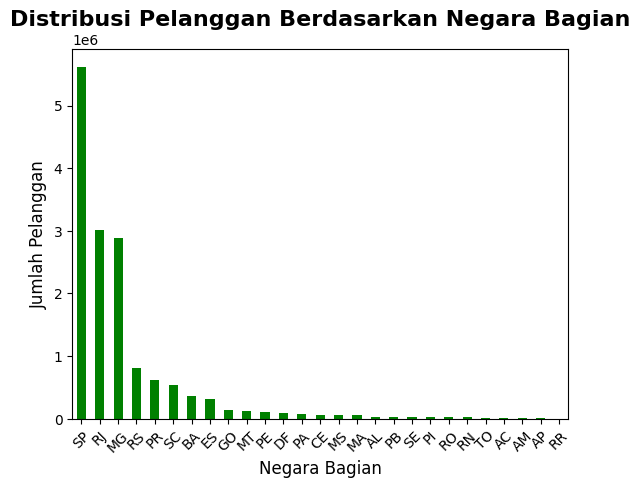

In [38]:
# Menggabungkan data pelanggan untuk mendapatkan informasi demografi
customer_data = pd.merge(orders, customers, on='customer_id')

# Menghitung jumlah pelanggan per kota dan negara bagian
customer_by_state = customer_data['customer_state'].value_counts()
customer_by_city = customer_data['customer_city'].value_counts().head(10)

# Visualisasi
customer_by_state.plot(kind='bar', color='#008000', legend=False)
plt.title('Distribusi Pelanggan Berdasarkan Negara Bagian', fontsize=16, fontweight='bold')
plt.xlabel('Negara Bagian', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Insight:**

Negara bagian seperti São Paulo (SP), Minas Gerais (MG), dan Rio de Janeiro (RJ) menjadi pusat perhatian dalam hal jumlah pelanggan, yang mungkin mencerminkan potensi penjualan tertinggi di wilayah tersebut. Di sisi lain, negara bagian dengan jumlah pelanggan yang lebih kecil memerlukan pendekatan yang lebih strategis untuk meningkatkan penjualan, dan memahami alasan di balik perbedaan ini bisa menjadi kunci untuk memperluas pasar di wilayah tersebut.

## Conclusion

- **Conclution pertanyaan 1 :** Tren pendapatan menunjukkan pertumbuhan yang stabil dari akhir 2016 hingga pertengahan 2018 dengan puncaknya pada awal 2018, diikuti oleh penurunan pada akhir tahun. Perusahaan perlu mengevaluasi faktor yang menyebabkan penurunan tersebut dan mereplikasi strategi yang berhasil meningkatkan revenue pada tahun sebelumnya.
- **Conclution pertanyaan 2 :** Kategori "bed_bath_table" adalah yang paling banyak terjual, diikuti oleh "health_beauty" dan "sports_leisure". Ini menunjukkan tingginya permintaan terhadap produk rumah tangga dan kesehatan. Kategori dengan volume rendah seperti "garden_tools" dan "auto" memerlukan pendekatan pemasaran yang lebih kuat, seperti promosi atau diskon, untuk meningkatkan daya tariknya. Penurunan penjualan di akhir 2018 perlu dianalisis lebih lanjut untuk memahami penyebabnya dan memanfaatkan strategi promosi yang efektif.
- **Conclution pertanyaan 3 :** Sebagian besar pelanggan tidak aktif dalam jangka waktu yang lama, hanya melakukan satu kali transaksi, dan sebagian besar pendapatan berasal dari sedikit pelanggan. Strategi untuk meningkatkan loyalitas, pembelian berulang, dan re-engagement pelanggan perlu diperkuat untuk meningkatkan customer lifetime value dan retensi pelanggan.
- **Conclution pertanyaan 4 :** Sebagian besar pesanan berhasil dikirim dengan status "delivered", menandakan operasi pengiriman yang efisien. Namun, perlu analisis lebih lanjut untuk mengatasi pesanan yang dibatalkan atau tidak berhasil dikirim guna memastikan proses pengiriman berjalan lebih lancar.
- **Conclution pertanyaan 5 :** Mayoritas pengiriman sesuai dengan estimasi waktu yang diberikan, namun terdapat sejumlah kecil pengiriman yang terlambat. Perusahaan dapat meningkatkan efisiensi dengan mengidentifikasi faktor yang menyebabkan keterlambatan untuk meminimalkan hal tersebut di masa depan.
- **Conclution pertanyaan 6 :** Sebagian besar pelanggan adalah pelanggan baru. Untuk mempertahankan pelanggan ini, perusahaan perlu menerapkan strategi retensi yang efektif agar mereka melakukan pembelian ulang dan menjadi pelanggan setia.
- **Conclution pertanyaan 7 :** Penjual dengan ID 4869f memiliki performa penjualan tertinggi dengan jarak yang cukup jauh dari penjual lainnya. Penjual top lainnya memiliki performa yang relatif setara, yang berarti masih ada potensi untuk penjual lain bersaing dan meningkatkan performa penjualan mereka.